<a href="https://colab.research.google.com/github/piegian99ita/machine_learning/blob/main/02_Learning_methodology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Learning Methodology

### Content
In this lab we will understand the importance of data management. We will leverage a Linear Classifier and analyze how its behaviour changes as a function of the data it is fed.

### Data
We will use the IRIS Dataset, whose detailed description you can find [here](https://archive.ics.uci.edu/ml/datasets/iris). The underlying task is to perform correct classification of flowers. 

The **classes** of this dataset are:  
1. Iris Setosa;
2. Iris Versicolour;
3. Iris Virginica;

Each sample in this dataset is represented by the following **attributes**:
1. sepal length;
2. sepal width;
3. petal length;
4. petal width;

all of which are expressed in $[cm]$.


Given this information, we can formally say:
- $D = \{(\pmb{x_i}, y_i)| i = 1, ... , N\}$  
- $\pmb{x_i} \in \mathbb{R}^4, \forall i$
- $y_i \in \mathbb{N}; y_i \in \{0, 1, 2\}$

In [ ]:
# this line is needed to display plots in this notebook
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

# let's download the dataset and store it in the "iris_object" variable
from sklearn.datasets import load_iris
iris_object = load_iris(as_frame=True)
print("iris_object contains the following fields:", dir(iris_object))

iris_object contains the following fields: ['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


##Inspecting the IRIS Dataset  
From the above list of attributes, we are interested in the following:  
1. *data*: contains the $\pmb{x_i}$ samples arranged in a matrix $X \in \mathbb{R}^{N \times 4}$;
2. *target*: contains the labels $y_i$ arranged in a vector $\pmb{y} \in \mathbb{R}^{N}$;  
3. *feature_names*: names of the columns of $X$;
4. *target_names*: string mappings for the labels in $\pmb{y}$; $\{0,1, 2\}$ are replaced with $\{setosa, versicolour, virginica\}$, respectively.

In [ ]:
# let's inspect these attributes
def print_separator(text, n=25): 
  print("\n", "="*n, text, "="*n)

print_separator("INPUT_SPACE_INFORMATION")
X = iris_object.data                                # samples are stored in the data field
print("X (matrix of samples) has shape:", X.shape)  # 150 rows (samples), each with 4 attributes (columns)

feature_names = iris_object.feature_names
print("Each sample in X has the following attributes:", feature_names)

print_separator("LABEL_SPACE_INFORMATION")
y = iris_object.target                             # labels are stored in the target field
label_set = set(y)
print("y (vector of labels) has shape:", y.shape)  # 150 scalars, the i-th element is the label of the i-th element in X
print("the unique elements appearing in y are:", label_set)

# target_names contains the strings associated with the labels
target_names = iris_object.target_names
for label, label_name in zip(label_set, target_names):
  print(f"Samples with label {label} are {label_name}.")


 ========================= INPUT_SPACE_INFORMATION =========================
X (matrix of samples) has shape: (150, 4)
Each sample in X has the following attributes: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

 ========================= LABEL_SPACE_INFORMATION =========================
y (vector of labels) has shape: (150,)
the unique elements appearing in y are: {0, 1, 2}
Samples with label 0 are setosa.
Samples with label 1 are versicolor.
Samples with label 2 are virginica.


In [ ]:
# a nice tabular visualization is provided by the Pandas library
# (for those interested: https://pandas.pydata.org/docs/)
print("First 5 elements of the dataset")
X.head(n=5)

First 5 elements of the dataset


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Exercise 1

You are required to define a function named **train_test_split**, which takes as input $X$, $\pmb{y}$ and a *nfolds* integer, returning 4 things:  
1. *X_train*: samples in the training set;
2. *y_train*: labels of the samples in the training set;
3. *X_test*: samples in the test set;
4. *y_test*: labels of the samples in the test set.

The *nfolds* argument defines in how many partitions (folds) should the dataset be divided. If $nfolds = 5$, then 5 folds with 30 samples each must be created; 4 of them should be merged to comprise the training set (X_train, y_train), whilst the remaining one will be (X_test, y_test).

The function should not be deterministic: two different executions of **train_test_split** should provide different items in the returned sets. For simplicity, you may assume $N$ will always be divisible by $nfolds$.

In [ ]:
import numpy as np
from numpy.random import default_rng
rng = default_rng()  # random number generator

# HINT: NumPy comes with a suite of utilities for functionalities related to
# random numbers. For this task, I suggest the usage of np.random.choice, which
# returns a random subset of elements within an array or an upper bound.
# Check it out here! https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html#numpy.random.Generator.choice 

# Example usage:
# - N = # number_of_samples
# - random_index = rng.choice(N)  # returns 1 random item from 0 to N
# - random_indices = rng.choice(N, size=(k))  # returns k random items from 0 to N
# NOTE: caution with replacements!  

# HINT2: a good move would be to divide the dataset in folds. 

# NOTE2: both X and y are Pandas objects returned by load_iris. Convert them
# to NumPy arrays with:
# - Xnp = X.to_numpy()
# - ynp = y.to_numpy()


# the following is a utility function provided to you; given a list of tuples as
# [(X_fold1, y_fold1), ..., (X_foldk, y_foldk)] it merges samples and labels
# into a unique (X_train, y_train).
def merge_folds(folds):
  return np.concatenate([X for (X, y) in folds], axis=0), \
  np.concatenate([y for (X, y) in folds], axis=0)


def train_test_split(X, y, folds=5):
  """
    Functionality:
      Splits the training data :param X: and :param y: into a training set
      (X_train and y_train) and a test set (X_test and y_test).  
      The number of items in the sets is determined by the :param folds:,
      i.e. N/folds samples go in the test set while the rest shall 
      be put in the train set.  


    Params:
      :param X: sampleset of shape (N, dim) (in our case (N,4))
      :param y: label set of shape (N,)
      :param folds: integer value
    
    
    Usage:  
      X_train, y_train, X_test, y_test = train_test_split(X, y, folds)
  """
  # MODIFY THE BODY OF THIS FUNCTION TO GRAB
  # X_train, y_train, X_test, y_test
  pass

##Exercise 1, Proposed Solution

NB: This is one of MANY possible solutions. Do absolutely NOT get discouraged if
your implementation does not match!

In [ ]:
import numpy as np
from numpy.random import default_rng
rng = default_rng()  # random number generator


def train_test_split(X, y, nfolds=5):
  """
    Functionality:
      Splits the training data :param X: and :param y: into a training set
      (X_train and y_train) and a test set (X_test and y_test).  
      The number of items in the sets is determined by the :param folds:,
      i.e. N/folds samples go in the test set while the rest shall 
      be put in the train set.  


    Params:
      :param X: sampleset of shape (N, dim) (in our case (N,4))
      :param y: label set of shape (N,)
      :param folds: integer value
    
    
    Usage:  
      X_train, y_train, X_test, y_test = train_test_split(X, y, folds)
  """
  assert isinstance(X, np.ndarray) and isinstance(y, np.ndarray)
  
  # determine how many samples comprise the train and test sets
  N, _ = X.shape
  samples_per_fold = int(N / nfolds)
  all_indices = np.arange(N)  # indices from o to N

  # create the different folds
  folds = []
  for i in range(nfolds):
    # randomly draw :samples_per_fold: samples from the dataset
    fold_indices = rng.choice(all_indices, size=(samples_per_fold), replace=False)
    current_fold = (X[fold_indices], y[fold_indices])
    folds.append(current_fold)

    # since we do not want common elements among folds, we shall remove the
    # drawn indices from the available ones before creating the next fold!
    all_indices = list(set(all_indices) - set(fold_indices))

  # once all the folds are built, 1 will be our test set while k-1 will be
  # our training set
  X_train, y_train = merge_folds(folds[:-1])
  X_test, y_test = folds[-1]
  return X_train, y_train, X_test, y_test

# convert to numpy before execution
Xnp, ynp = X.to_numpy(), y.to_numpy()

# run the split!
X_train, y_train, X_test, y_test = train_test_split(Xnp, ynp, nfolds=3)
print("Items in the training set:", X_train.shape, y_train.shape)
print("Items in the test set:", X_test.shape, y_test.shape)

Items in the training set: (100, 4) (100,)
Items in the test set: (50, 4) (50,)


### Implementation Notes
In this implementation, the absence of deterministic behaviour is guaranteed by the presence of a random function, i.e. *np.random.choice*. This could've been guaranteed also with different random functions, such as *np.random.permutation*. Key Insight: instead of generating random indices, you could've used fixed indices while randomly permuting the dataset!

**Takeaway**: it is seldom the case a unique implementation exists. Your job is to come up with a solution that balances ease of comprehension, efficacy and effectiveness, while satisfying all the requirements.

## Data Visualization
A useful practice for ML practitioners is to inspect the data, especially in terms of **class distributions**. The following code cell print information about the class distribution, as well as arranging train and test sets in pie charts for better visual representation.


 ========================= DATASET SUMMARY =========================
[TRAIN]: 30 samples of class 0 (30.00%)
[TEST]: 20 samples of class 0 (40.00%)

[TRAIN]: 34 samples of class 1 (34.00%)
[TEST]: 16 samples of class 1 (32.00%)

[TRAIN]: 36 samples of class 2 (36.00%)
[TEST]: 14 samples of class 2 (28.00%)



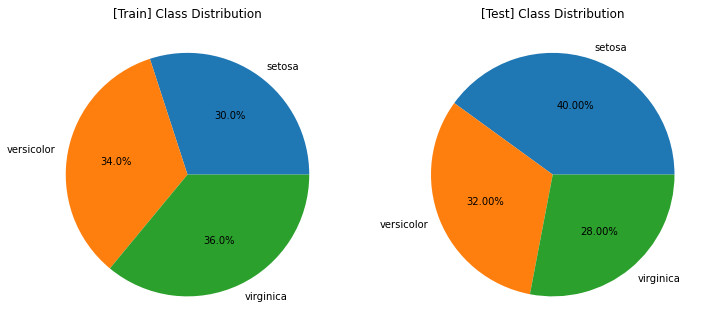

In [ ]:
def dataset_summary(y_train,
                    y_test, 
                    num_classes=3, 
                    class_names=None,
                    show=False):
  """
    Functionality:
    Prints information about the class distribution in both 
    the training and the test sets. Optionally, it also visually displays such
    distributions in a Pie Chart.

    Params:
    :param y_train: 1D array with the labels of the training samples;
    :param y_test: 1D array with the labels of the test samples;
    :param num_classes: (Optional) total number of classes expected to be in 
    the dataset. Default: 3;
    :param class_names: (Optional) string mappings for the classes. Default: list
    of class indices;
    :param show: (Optional) if set to True, the Pie Charts are displayed. 
    Default: False.
  """
  print_separator("DATASET SUMMARY")
  
  # grab the number of samples for both train and test sets
  train_samples = y_train.shape[0]
  test_samples = y_test.shape[0]

  # divide samples based on their class label
  train_sizes, test_sizes = [], []
  for cls_label in range(num_classes): 
      cls_train_samples = np.sum(np.where(y_train==cls_label, 1, 0))
      cls_test_samples = np.sum(np.where(y_test==cls_label, 1, 0)) 
      train_sizes.append(cls_train_samples)
      test_sizes.append(cls_test_samples)
      print(f"[TRAIN]: {cls_train_samples} samples of class {cls_label} ({cls_train_samples/train_samples*100:.2f}%)")
      print(f"[TEST]: {cls_test_samples} samples of class {cls_label} ({cls_test_samples/test_samples*100:.2f}%)\n")

  if not show: return
  
  if class_names is None:
    class_names = [f"Class {i}" for i in range(num_classes)]

  # create a figure and split it vertically
  plt.figure(figsize=(12,12))
  plt.subplot(1,2,1)

  # populate left subplot with training data
  plt.title("[Train] Class Distribution")
  plt.pie(train_sizes, labels=iris_object.target_names, autopct='%1.1f%%')

  # populate right subplot with test data
  plt.subplot(1,2,2)
  plt.title("[Test] Class Distribution")
  plt.pie(test_sizes, labels=iris_object.target_names, autopct='%1.2f%%')

dataset_summary(y_train, y_test, show=True, class_names=iris_object.target_names)

##Training a Linear Classifier

We will now see how to train a Linear Classifier on the training set, while evaluating it on the provided test set.

In this lab we do not focus on the implementation of the classifier, so think of it as a black box, that given $X \in \mathbb{R}^{N_{train} \times 4}$ and $y \in \mathbb{R}^{N_{train}}$, provides with with a parameter estimate $\hat{w}$.

In [ ]:
# import a logistic regression classifier with SGD and instantiate it
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty="l2", multi_class="ovr", max_iter=100)

# estimate the parameters on the training set
clf.fit(X_train, y_train)

# predict the outcome of the test samples
y_pred = clf.predict(X_test)

# display the predicted class for each sample in the test set
for i, prediction in enumerate(y_pred[:10]):
  print(f"Prediction for sample {i+1} = {iris_object.target_names[prediction]}")

Prediction for sample 1 = virginica
Prediction for sample 2 = virginica
Prediction for sample 3 = setosa
Prediction for sample 4 = virginica
Prediction for sample 5 = virginica
Prediction for sample 6 = setosa
Prediction for sample 7 = versicolor
Prediction for sample 8 = versicolor
Prediction for sample 9 = virginica
Prediction for sample 10 = virginica


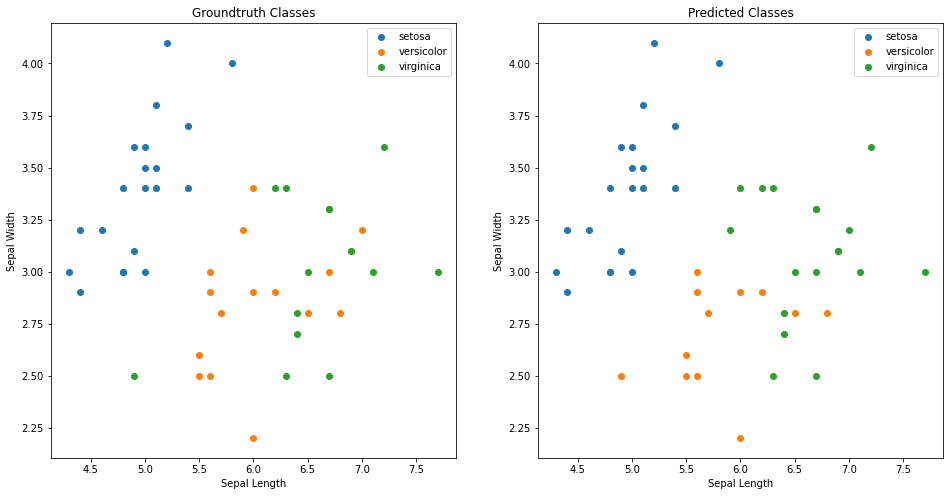

In [ ]:
def scatter_classification(X, y, y_pred, 
                           chosen_feats=[0,1],
                           axes_labels=["Sepal Length", "Sepal Width"]):
  plt.figure(figsize=(16,8))

  X = X[:, chosen_feats]
  num_classes = len(list(set(y)))
  colors = ["tab:blue", "tab:orange", "tab:green"]
  labels = ["setosa", "versicolor", "virginica"]
  for cls in range(num_classes):
    plt.subplot(1,2,1)
    cls_indices = np.where(y == cls)[0]
    cls_samples = X[cls_indices]
    plt.scatter(x=cls_samples[:, 0], 
                y=cls_samples[:, 1],
                color=colors[cls], label=labels[cls])
    
    plt.subplot(1,2,2)
    cls_indices = np.where(y_pred == cls)[0]
    cls_samples = X[cls_indices]
    plt.scatter(x=cls_samples[:, 0], 
                y=cls_samples[:, 1],
                color=colors[cls], label=labels[cls])
  
  plt.subplot(1,2,1)
  plt.title("Groundtruth Classes")
  plt.xlabel(axes_labels[0])
  plt.ylabel(axes_labels[1])
  plt.legend()
  plt.subplot(1,2,2)
  plt.title("Predicted Classes")
  plt.xlabel(axes_labels[0])
  plt.ylabel(axes_labels[1])
  plt.legend()

# visualize classes based on sepal length and width
y_train_pred = clf.predict(X_train)
scatter_classification(X_test, y_test, y_pred)

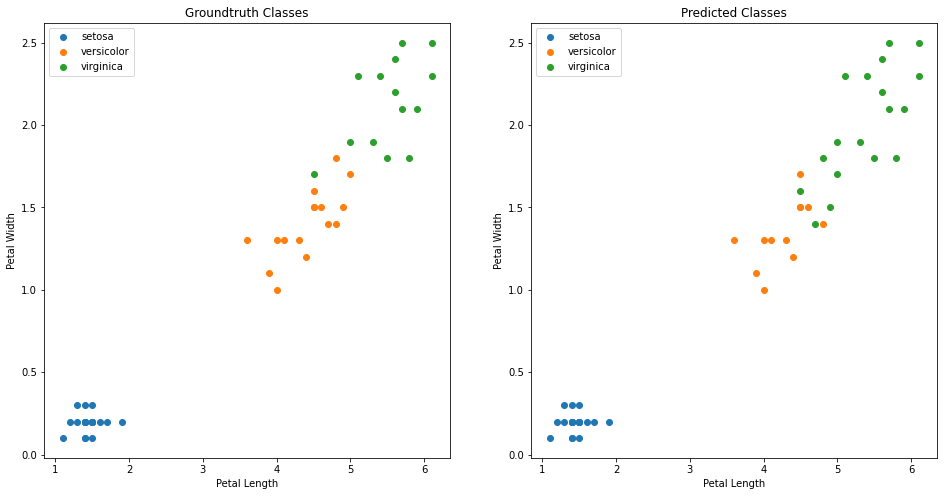

In [ ]:
# visualize classes based on petal length and width
scatter_classification(X_test, y_test, y_pred,
                       chosen_feats=[-2, -1],
                       axes_labels=["Petal Length", "Petal Width"])

##Evaluation  
We are now able to predict labels for *unseen* samples in the test set, but we are still missing something. Specifically, we are not **evaluating** our classifier!  

In class, you have been presented the concepts of:  
1. \begin{equation}Accuracy = \frac{\text{# correctly classified samples}}{\text{# total samples}}\end{equation}

2. \begin{equation}Precision = \text{# correctly classified samples } | \text{ # samples classified as positive}\end{equation}

3. \begin{equation}Recall = \text{# correctly classified samples } | \text{ # samples labelled as positive}\end{equation}

These concepts can be extracted starting from a confusion matrix, which, in the simplified scenario of Binary Classification (not our case!), is defined as:

\begin{equation}
ConfusionMatrix = \begin{bmatrix}
                  TN & FP \\
                  FN & TP 
                  \end{bmatrix}
\end{equation}

Notice that from a Binary Confusion Matrix we can directly extract the previous metrics as:  
1. \begin{equation}Accuracy = \frac{TP+TN}{TP + FP + TN + FN}\end{equation}

2. \begin{equation}Precision = \frac{TP}{TP+FP}\end{equation}

3. \begin{equation}Recall = \frac{TP}{TP+FN}\end{equation}

## Exercise 2
Define a function to build a Confusion Matrix for a $C$-class classification problem. The function should take as input a vector of groundtruth labels $y \in \mathbb{R}^{N_{test}}$ and a vector of predicted labels $\hat{y} \in \mathbb{R}^{N_{test}}$ and return a confusion matrix $ConfMat \in \mathbb{R}^{C \times C}$.

Once the confusion matrix is available, also define three functions which take as input a confusion matrix and class index to return a real number: *accuracy*, *precision* and *recall*. The latter two metrics should be flexible, and must be class-dependent.

In [ ]:
# HINT: you may want to start building the confusion matrix from an initial
# matrix full of zeros. You can such a matrix with np.zeros.
# Check it out here: https://numpy.org/doc/stable/reference/generated/numpy.zeros.html

def confusion_matrix(y_gt, y_pred, num_classes=3):
  """
    Builds a (num_classes x num_classes) confusion matrix for the evaluation of a 
    multiclass Classifier.

    Params:
      :param y_gt: vector of shape (N,) containing the groundtruth labels;
      :param y_pred: vector of shape (N,) containing the classifier predictions.
      :param num_classes: total number of classes in the dataset.

    Returns:
      :out confusion_matrix: CxC matrix
  """
  # WRITE YOUR IMPLEMENTATION HERE
  pass


def accuracy(conf_mat):
  """
    Computes the accuracy of a classifier starting from a Confusion Matrix.
  """
  # WRITE YOUR IMPLEMENTATION HERE
  pass


def precision(conf_mat, class_idx=0):
  """
    Computes the precision of the classifier with respect to :param class:
    starting from a Confusion Matrix.
  """
  # WRITE YOUR IMPLEMENTATION HERE
  pass


def recall(conf_mat, class_idx=0):
  """
    Computes the recall of the classifier with respect to :param class: starting
    from a Confusion Matrix.
  """
  # WRITE YOUR IMPLEMENTATION HERE
  pass

## Exercise 2, Proposed Solution

In [ ]:
def confusion_matrix(y_gt, y_pred, num_classes=3):
  """
    Builds a (num_classes x num_classes) confusion matrix for the evaluation of 
    a multiclass Classifier.

    Params:
      :param y_gt: vector of shape (N,) containing the groundtruth labels;
      :param y_pred: vector of shape (N,) containing the classifier predictions;
      :param num_classes: total number of classes in the dataset.

    Returns:
      :out confusion_matrix: CxC matrix
  """
  # initialize a CxC confusion matrix filled with zeros
  conf_mat = np.zeros(shape=(num_classes, num_classes))

  for gt, pred in zip(y_gt, y_pred):
    # the gt is the row index
    # the pred is the col index
    conf_mat[gt, pred] += 1
  
  return conf_mat


def accuracy(conf_mat):
  """
    Computes the accuracy of a classifier starting from a Confusion Matrix.
  """
  # number of correctly classified samples is the trace of the matrix
  # (i.e. sum of the elements along the main diagonal)
  correct_samples = np.trace(conf_mat)

  # total number of samples is the sum of the entries of the matrix
  tot_samples = np.sum(conf_mat)

  return correct_samples / tot_samples


def precision(conf_mat, class_idx=0):
  """
    Computes the precision of the classifier with respect to :param class:
    starting from a Confusion Matrix.
  """

  # number of correctly classified samples are the ones at C[class_idx, class_idx]
  correct_samples = conf_mat[class_idx, class_idx]

  # number of samples classified as the focus class is the sum along the 
  # :param class_idx: column
  samples_classified_as_class = np.sum(conf_mat[:, class_idx])

  return correct_samples / (samples_classified_as_class + np.finfo(float).eps)


def recall(conf_mat, class_idx=0):
  """
    Computes the recall of the classifier with respect to :param class: starting
    from a Confusion Matrix.
  """

  # number of correctly classified samples are the ones at C[class_idx, class_idx]
  correct_samples = conf_mat[class_idx, class_idx] 

  # total samples labelled as the focus class is the sum along the 
  # :param class_idx: row
  samples_labelled_as_class = np.sum(conf_mat[class_idx, :])

  return correct_samples / (samples_labelled_as_class + np.finfo(float).eps)

## Results Visualization

Common practice among Machine Learning practitioners is to also **visualize the obtained results**. It is difficult to grasp concepts from a purely textual representation. For instance, execute the code cell below and have a look at its output.

(NOTE: The actual code is not relevant for today's purposes.)

In [ ]:
def evaluation_summary(y, y_pred, num_classes=3, show=False, class_names=iris_object.target_names):
  print_separator("EVALUATION SUMMARY")
  
  # evaluate the previously trained classifier
  conf_mat = confusion_matrix(y_test, y_pred)
  acc = accuracy(conf_mat)
  print(f"Accuracy of the classifier = {acc*100:.2f}%\n")

  # evaluate precision and recall w.r.t. the different classes
  precisions, recalls = [], []
  for cls in range(num_classes):
    cls_precision = precision(conf_mat, class_idx=cls)
    cls_recall = recall(conf_mat, class_idx=cls)
    precisions.append(cls_precision)
    recalls.append(cls_recall)
    print(f"When {class_names[cls]} is predicted, classifier is correct {cls_precision*100:.2f}% of the times")
    print(f"When facing {class_names[cls]} samples, classifier is correct {cls_recall*100:.2f}% of the times\n")
  
  if not show: return

  if class_names is None:
    class_names = [f"Class {cls}" for cls in range(num_classes)]

  # display precision and recall by vertical bars for each class
  fig, axes_tuple = plt.subplots(nrows=1, ncols=num_classes, sharey=True, figsize=(9,6))
  for cls in range(num_classes):
    ax = axes_tuple[cls]
    ax.set_title(iris_object.target_names[cls])
    ax.bar(x=[0,1], height=[precisions[cls], recalls[cls]], color=["tab:orange", "tab:blue"])
    ax.set_xticks([0,1])
    ax.set_xticklabels(["precision", "recall"])

evaluation_summary(y_test, y_pred, show=False)


 ========================= EVALUATION SUMMARY =========================
Accuracy of the classifier = 88.00%

When setosa is predicted, classifier is correct 100.00% of the times
When facing setosa samples, classifier is correct 100.00% of the times

When versicolor is predicted, classifier is correct 91.67% of the times
When facing versicolor samples, classifier is correct 68.75% of the times

When virginica is predicted, classifier is correct 72.22% of the times
When facing virginica samples, classifier is correct 92.86% of the times



The above has provided you with a textual representation of your evaluation, printing out the accuracy of your classifier, as well as the precision and recall conditioned on all the available classes. Even though these data are detailed, you have to focus on each printed line and try to remember what you read so far to have a clear picture.

Instead, coming up with a visual representation incredibly enhances clarity!


 ========================= EVALUATION SUMMARY =========================
Accuracy of the classifier = 88.00%

When setosa is predicted, classifier is correct 100.00% of the times
When facing setosa samples, classifier is correct 100.00% of the times

When versicolor is predicted, classifier is correct 91.67% of the times
When facing versicolor samples, classifier is correct 68.75% of the times

When virginica is predicted, classifier is correct 72.22% of the times
When facing virginica samples, classifier is correct 92.86% of the times



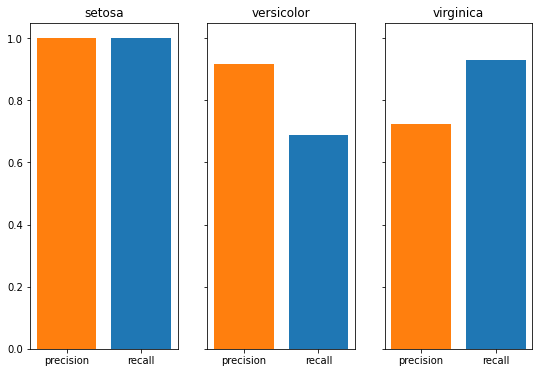

In [ ]:
# run the same evaluation as before, but pass the flag show=True to 
# also visually display the performance of your classifier
evaluation_summary(y_test, y_pred, show=True)

## Class Balance

In the above, we saw that our classifier exhibits good performances. We also have prior knowledge on the dataset, as we know that it is composed of 33.3% $setosa$, 33.3% $versicolour$ and 33.3% $virginica$ samples.
A question now arises: how would the classifier behave in the presence of imbalanced classes? Would it behave equally?

The code cell below samples a training and a test set, then reduces one of the classes by a large amount by getting rid of its samples.


 ========================= DATASET SUMMARY =========================
[TRAIN]: 28 samples of class 0 (43.08%)
[TEST]: 22 samples of class 0 (36.07%)

[TRAIN]: 11 samples of class 1 (16.92%)
[TEST]: 15 samples of class 1 (24.59%)

[TRAIN]: 26 samples of class 2 (40.00%)
[TEST]: 24 samples of class 2 (39.34%)



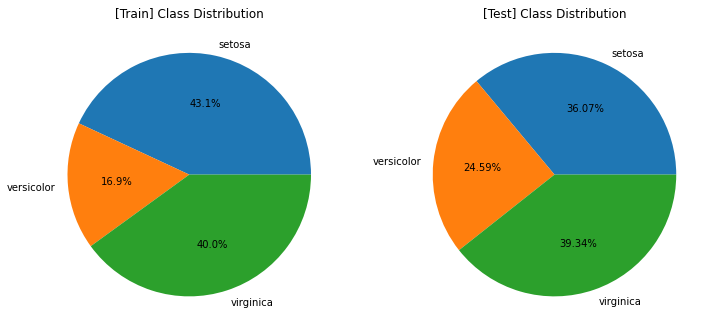

In [ ]:
def sample_unbalanced_dataset(*args, **kwargs):
  assert "reduce_cls" in kwargs and "reduction" in kwargs 
  X_train, y_train, X_test, y_test = train_test_split(*args, kwargs["nfolds"])

  # reduce the training data
  train_indices = np.where(y_train == kwargs["reduce_cls"])[0]
  remove_indices = rng.choice(train_indices, 
                              size=int(train_indices.shape[0]*kwargs["reduction"]),
                              replace=False)
  X_train = np.delete(X_train, obj=remove_indices, axis=0)
  y_train = np.delete(y_train, obj=remove_indices)

  # reduce the test data
  test_indices = np.where(y_test == kwargs["reduce_cls"])[0]
  remove_indices = rng.choice(test_indices, 
                              size=int(test_indices.shape[0]*kwargs["reduction"]),
                              replace=False)
  X_test = np.delete(X_test, obj=remove_indices, axis=0)
  y_test = np.delete(y_test, obj=remove_indices)

  return X_train, y_train, X_test, y_test

# parameters of the reduction
class_to_reduce = "versicolor"     # you can play with this and substitute it
reduction = 0.5                    # the greater this value, the less samples will remain

# perform the reduction
reduce_cls = list(iris_object.target_names).index(class_to_reduce)
X_train, y_train, X_test, y_test = sample_unbalanced_dataset(Xnp, ynp, 
                                                             nfolds=2, 
                                                             reduce_cls=reduce_cls, 
                                                             reduction=reduction)
dataset_summary(y_train, y_test, show=True)


 ========================= EVALUATION SUMMARY =========================
Accuracy of the classifier = 81.97%

When setosa is predicted, classifier is correct 100.00% of the times
When facing setosa samples, classifier is correct 100.00% of the times

When versicolor is predicted, classifier is correct 100.00% of the times
When facing versicolor samples, classifier is correct 26.67% of the times

When virginica is predicted, classifier is correct 68.57% of the times
When facing virginica samples, classifier is correct 100.00% of the times



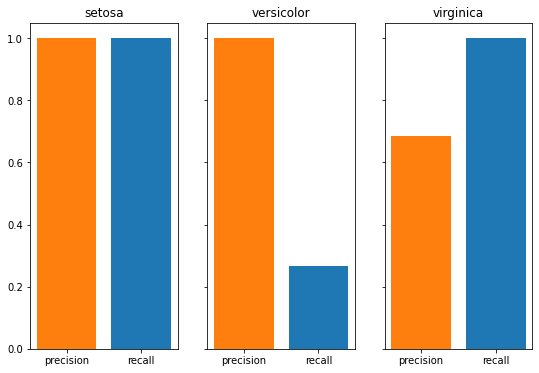

In [ ]:
# now let's retrain the classifier and see if the performances remain unchanged
clf.fit(X_train, y_train)

# predict the outcome of the test samples
y_pred = clf.predict(X_test)
evaluation_summary(y_test, y_pred, show=True)

## K-Fold Validation
When working with a dataset, it is difficult to assess the quality of the classifier you have designed. Additionally, as you have seen above, classifiers are very dependent on the data they are provided. For these reasons, a common practice is to employ **K-Fold Validation**.

In this setting, the dataset is divided into $K$ equal partitions (i.e. the *folds*), and exactly $K$ repetitions of the train-and-test paradigm are run.
In each repetition, one fold is left out as the test set, while the other $K-1$ folds are aggregated to build the training set.

As a consequence, we obtain $K$ different values for the accuracy, the precision and the recall of the model, which depend on the specific partition they are trained on. Aggregating these results (i.e. averaging them) provide us with a good estimate of our classifier choice.

# Assignment for the next lab
Implement K-Fold Validation, by leveraging the functions for dataset management, logistic regression fitting and performance evaluation that we have seen in this lab. 

Additionally, you may also use the following functions:
- the first takes as input the IRIS dataset and a value for $K$, returning the $K$ folds as tuples within a list;
- the second computes the average precision and recall on all classes, given a classification outcome and the respective labels.

In [ ]:
# please note this code snippet was already part of the "train_test_split" fn

def make_folds(X, y, k=5):
  """
    Functionality:  
    
    splits the dataset set (X,y) into k folds, returning them within a list of
    tuples as [(X_fold1, y_fold1), ... , (X_foldk, y_foldk)].

    Params:  
    :param X: samples in the dataset. Array of shape (N, dim), where N is the
    total number of samples and dim is the dimensionality of the input feature
    space;  
    :param y: labels in the dataset. Array of shape (N), where the i-th entry
    corresponds to the label of the i-th sample in X (i.e. the i-th row of X);  
    :param k: the number of folds to be computed. For simplicity, it must be 
    a divider of N.

    Usage:  
    X = # input samples
    y = # input labels
    k = # desider number of folds
    folds = make_folds(X, y, k=k)
  """

  N, dim = X.shape
  assert N % k == 0, "Make sure k is a divider of N!"

  # determine how many samples comprise the train and test sets
  N, _ = X.shape
  samples_per_fold = int(N / k)
  all_indices = np.arange(N)

  # create the different folds
  folds = []
  for i in range(k):
    # randomly draw :samples_per_fold: samples from the dataset
    fold_indices = rng.choice(all_indices, size=(samples_per_fold), replace=False)
    current_fold = (X[fold_indices], y[fold_indices])
    folds.append(current_fold)

    # since we do not want common elements among folds, we shall remove the
    # drawn indices from the available ones before creating the next fold!
    all_indices = list(set(all_indices) - set(fold_indices))
  
  return folds

In [ ]:
def mean_precision_and_recall(conf_mat, num_classes=3):
  precisions = [precision(conf_mat, class_idx=cls) for cls in range(num_classes)]
  recalls = [recall(conf_mat, class_idx=cls) for cls in range(num_classes)]
  return sum(precisions) / len(precisions), sum(recalls) / len(recalls)

In [ ]:
def kfold_validation(X, y, k=5):
  ### WRITE YOUR IMPLEMENTATION HERE, FOLLOWING THE COMMENTS
  
  # instantiate the classifier
  clf = LogisticRegression(penalty="l2", multi_class="ovr", max_iter=100)
  
  # use the following variables to store accuracies, precisions and recalls
  accs, precs, recs = [], [], []

  # divide the dataset in folds


  # start looping k times. At each iteration, leave the i-th fold as test set
  # and aggregate the other ones as train set. You may use the 'merge_folds'
  # function introduced during the lab. 
  for i in range(k):
    # grab the test fold

    # aggregate all other folds in the train set

    # train, evaluate and store metrics for the current configuration
    pass


  # once all the k folds have been used for evaluation, average results and 
  # print them
  avg_acc = 0       # modify this line
  avg_prec = 0      # modify this line
  avg_rec = 0       # modify this line
  print_separator(f"{k}-fold Validation Results")
  print(f"Average Accuracy = {avg_acc:.2f}")
  print(f"Average Precision = {avg_prec:.2f}")
  print(f"Average Recall = {avg_rec:.2f}")

## Assignment: one of many possible solutions

In [ ]:
def kfold_validation(X, y, k=5): 
  # instantiate the classifier
  clf = LogisticRegression(penalty="l2", multi_class="ovr", max_iter=100)
  
  # use the following variables to store accuracies, precisions and recalls
  accs, precs, recs = [], [], []

  # divide the dataset in folds
  folds = make_folds(X, y, k)

  # start looping k times. At each iteration, leave the i-th fold as test set
  # and aggregate the other ones as train set. You may use the 'merge_folds'
  # function introduced during the lab. 
  for i in range(k):
    # grab the test fold
    X_test, y_test = folds[i]

    # aggregate all other folds in the train set
    folds_for_train = [fold for j, fold in enumerate(folds) if i!=j]
    X_train, y_train = merge_folds(folds_for_train)

    # train
    clf.fit(X_train, y_train)

    # and evaluate
    y_pred = clf.predict(X_test)
    conf_mat = confusion_matrix(y_pred, y_test)
    
    # store metrics for the current configuration
    acc = accuracy(conf_mat); accs.append(acc)
    prec, rec = mean_precision_and_recall(conf_mat)
    precs.append(prec); recs.append(rec)

  # once all the k folds have been used for evaluation, averaged results and 
  # print them
  avg_acc = sum(accs) / len(accs)
  avg_prec = sum(precs) / len(precs)
  avg_rec = sum(recs) / len(recs)

  print_separator(f"{k}-fold Validation Results")
  print(f"Average Accuracy = {avg_acc:.2f}")
  print(f"Average Precision = {avg_prec:.2f}")
  print(f"Average Recall = {avg_rec:.2f}")

kfold_validation(Xnp, ynp, k=5)


 ========================= 5-fold Validation Results =========================
Average Accuracy = 0.95
Average Precision = 0.95
Average Recall = 0.96
